In [1]:
import tensorflow as tf

C:\Users\sbean\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
import tensorflow as tf

import keras

%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
# nltk.download('punkt')
import string
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm


import seaborn as sns

import pydotplus
from IPython.display import Image

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

from sklearn.metrics import roc_auc_score

def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [3]:
Training = pd.read_csv("Data/cs-training.csv")

In [4]:
Test = pd.read_csv("Data/cs-test.csv")

Training = 150,000 entries
Test = 101,500



In [5]:
print(Training.describe())

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2

In [6]:
Training.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [7]:
Training.head()

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 1                              0.766127   45   
1                 0                              0.957151   40   
2                 0                              0.658180   38   
3                 0                              0.233810   30   
4                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   

In [8]:
Training.dropna(inplace=True)

In [9]:
Training.head()

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 1                              0.766127   45   
1                 0                              0.957151   40   
2                 0                              0.658180   38   
3                 0                              0.233810   30   
4                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   

In [10]:
Training.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [11]:
Training.SeriousDlqin2yrs.value_counts()

0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
from sklearn.cross_validation import train_test_split, cross_val_score

In [13]:
y = Training.SeriousDlqin2yrs

In [14]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [15]:
X = Training.drop(['SeriousDlqin2yrs'], axis=1)

In [16]:
prediction = dict()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(len(X_train))
print(len(X_test))

72161
48108


In [18]:
X_train.head()

       RevolvingUtilizationOfUnsecuredLines  age  \
86969                              0.441364   33   
53909                              0.617914   50   
42673                              0.212826   42   
14780                              0.092861   34   
44203                              0.146540   39   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
86969                                     0   0.263417         4266.0   
53909                                     1   0.637285         5921.0   
42673                                     0   0.247420        12500.0   
14780                                     0   0.235697         5400.0   
44203                                     0   0.358528         5000.0   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
86969                                7                        0   
53909                               16                        0   
42673                                8         

In [126]:
Outliers = pd.read_csv("Data/Outliers_Removed.csv")

In [127]:
y = Outliers.SeriousDlqin2yrs

In [128]:
X = Outliers.drop(['SeriousDlqin2yrs'], axis=1)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(len(X_train))
print(len(X_test))

69316
46211


In [130]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
prediction['Logistic'] = logreg.predict(X_test)

pred4=prediction['Logistic']
print(roc_auc_score(y_test, pred4))

0.5697561493968805


In [131]:
cm = pd.DataFrame(confusion_matrix(y_test, pred4).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print(cm)

True          No   Yes
Predicted             
No         42768  2641
Yes          345   457


In [132]:
pred_prob1 = logreg.predict_proba(X_test)[:,1]
pred_label1 = logreg.predict(X_test)
print("Tree 1 prediction value count: \n", pd.DataFrame(pred_label1).loc[:,0].value_counts())

logreg.score(X_test,y_test)

Tree 1 prediction value count: 
 0    45409
1      802
Name: 0, dtype: int64


0.9353833502845643

In [133]:
clf = DecisionTreeClassifier(max_depth=6, max_features=6)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

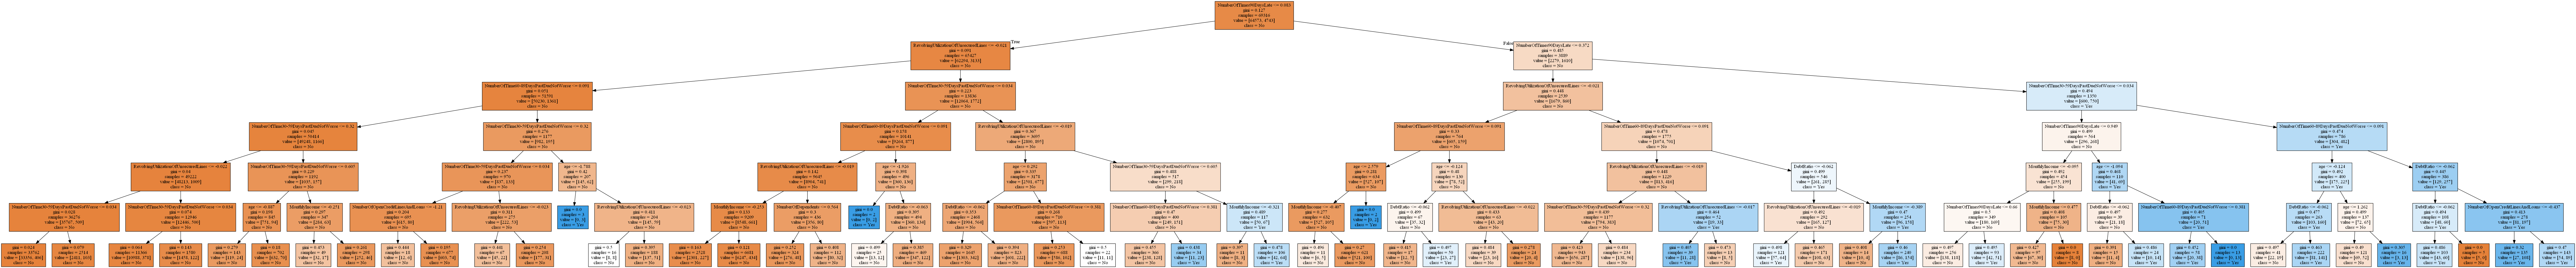

In [134]:
graph = print_tree(clf, features=X.columns, class_names=['No', 'Yes'])
Image(graph.create_png())

In [135]:
pred_prob1 = clf.predict_proba(X_test)[:,1]
pred_label1 = clf.predict(X_test)
print("Tree 1 prediction value count: \n", pd.DataFrame(pred_label1).loc[:,0].value_counts())

Tree 1 prediction value count: 
 0    45336
1      875
Name: 0, dtype: int64


In [136]:
cm = pd.DataFrame(confusion_matrix(y_test, pred_label1).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print(cm)

True          No   Yes
Predicted             
No         42731  2605
Yes          382   493


In [137]:
clf.score(X_test,y_test)

0.935361710415269

In [139]:
prediction['Tree'] = clf.predict(X_test)

pred10=prediction['Tree']
print(roc_auc_score(y_test, pred10))

0.5751372446156442


In [140]:
rfc1 = RandomForestClassifier(max_features=8,random_state=3)
rfc1.fit(X_train, y_train)
pred2 = rfc1.predict(X_test)
print("Tree 1 prediction value count: \n", pd.DataFrame(pred2).loc[:,0].value_counts())

Tree 1 prediction value count: 
 0    45103
1     1108
Name: 0, dtype: int64


In [141]:
rfc1.score(X_test,y_test)

0.9314016143342494

In [142]:
cm = pd.DataFrame(confusion_matrix(y_test, pred2).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print(cm)

True          No   Yes
Predicted             
No         42523  2580
Yes          590   518


In [143]:
prediction['forest']=forest.predict(X_test)
pred2 = prediction['forest']
print(roc_auc_score(y_test, pred2))

NameError: name 'forest' is not defined

In [144]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)
prediction['Multinomial'] = model.predict(X_test)
pred3=prediction['Multinomial']

cm = pd.DataFrame(confusion_matrix(y_test, pred3).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print(cm)

ValueError: Input X must be non-negative

In [145]:
print(roc_auc_score(y_test, pred3))

ValueError: Found input variables with inconsistent numbers of samples: [46211, 48108]

In [148]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train, y_train)
prediction['Bernoulli'] = model.predict(X_test)
pred8=prediction['Bernoulli']

cm = pd.DataFrame(confusion_matrix(y_test, pred8).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print(cm)

True          No   Yes
Predicted             
No         41698  2012
Yes         1415  1086


In [149]:
print(roc_auc_score(y_test, pred8))

0.6588640070981961


In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(60,60,60))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 60, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predictions).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print(cm)

True          No   Yes
Predicted             
No         44206  2825
Yes          538   539


In [147]:
print(roc_auc_score(y_test, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [46211, 48108]

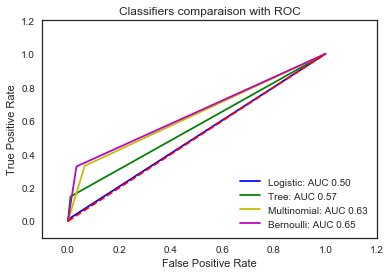

In [39]:
cmp = 0
colors = ['b', 'g', 'y', 'm', 'k','r', 'p', 'c']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1



plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)


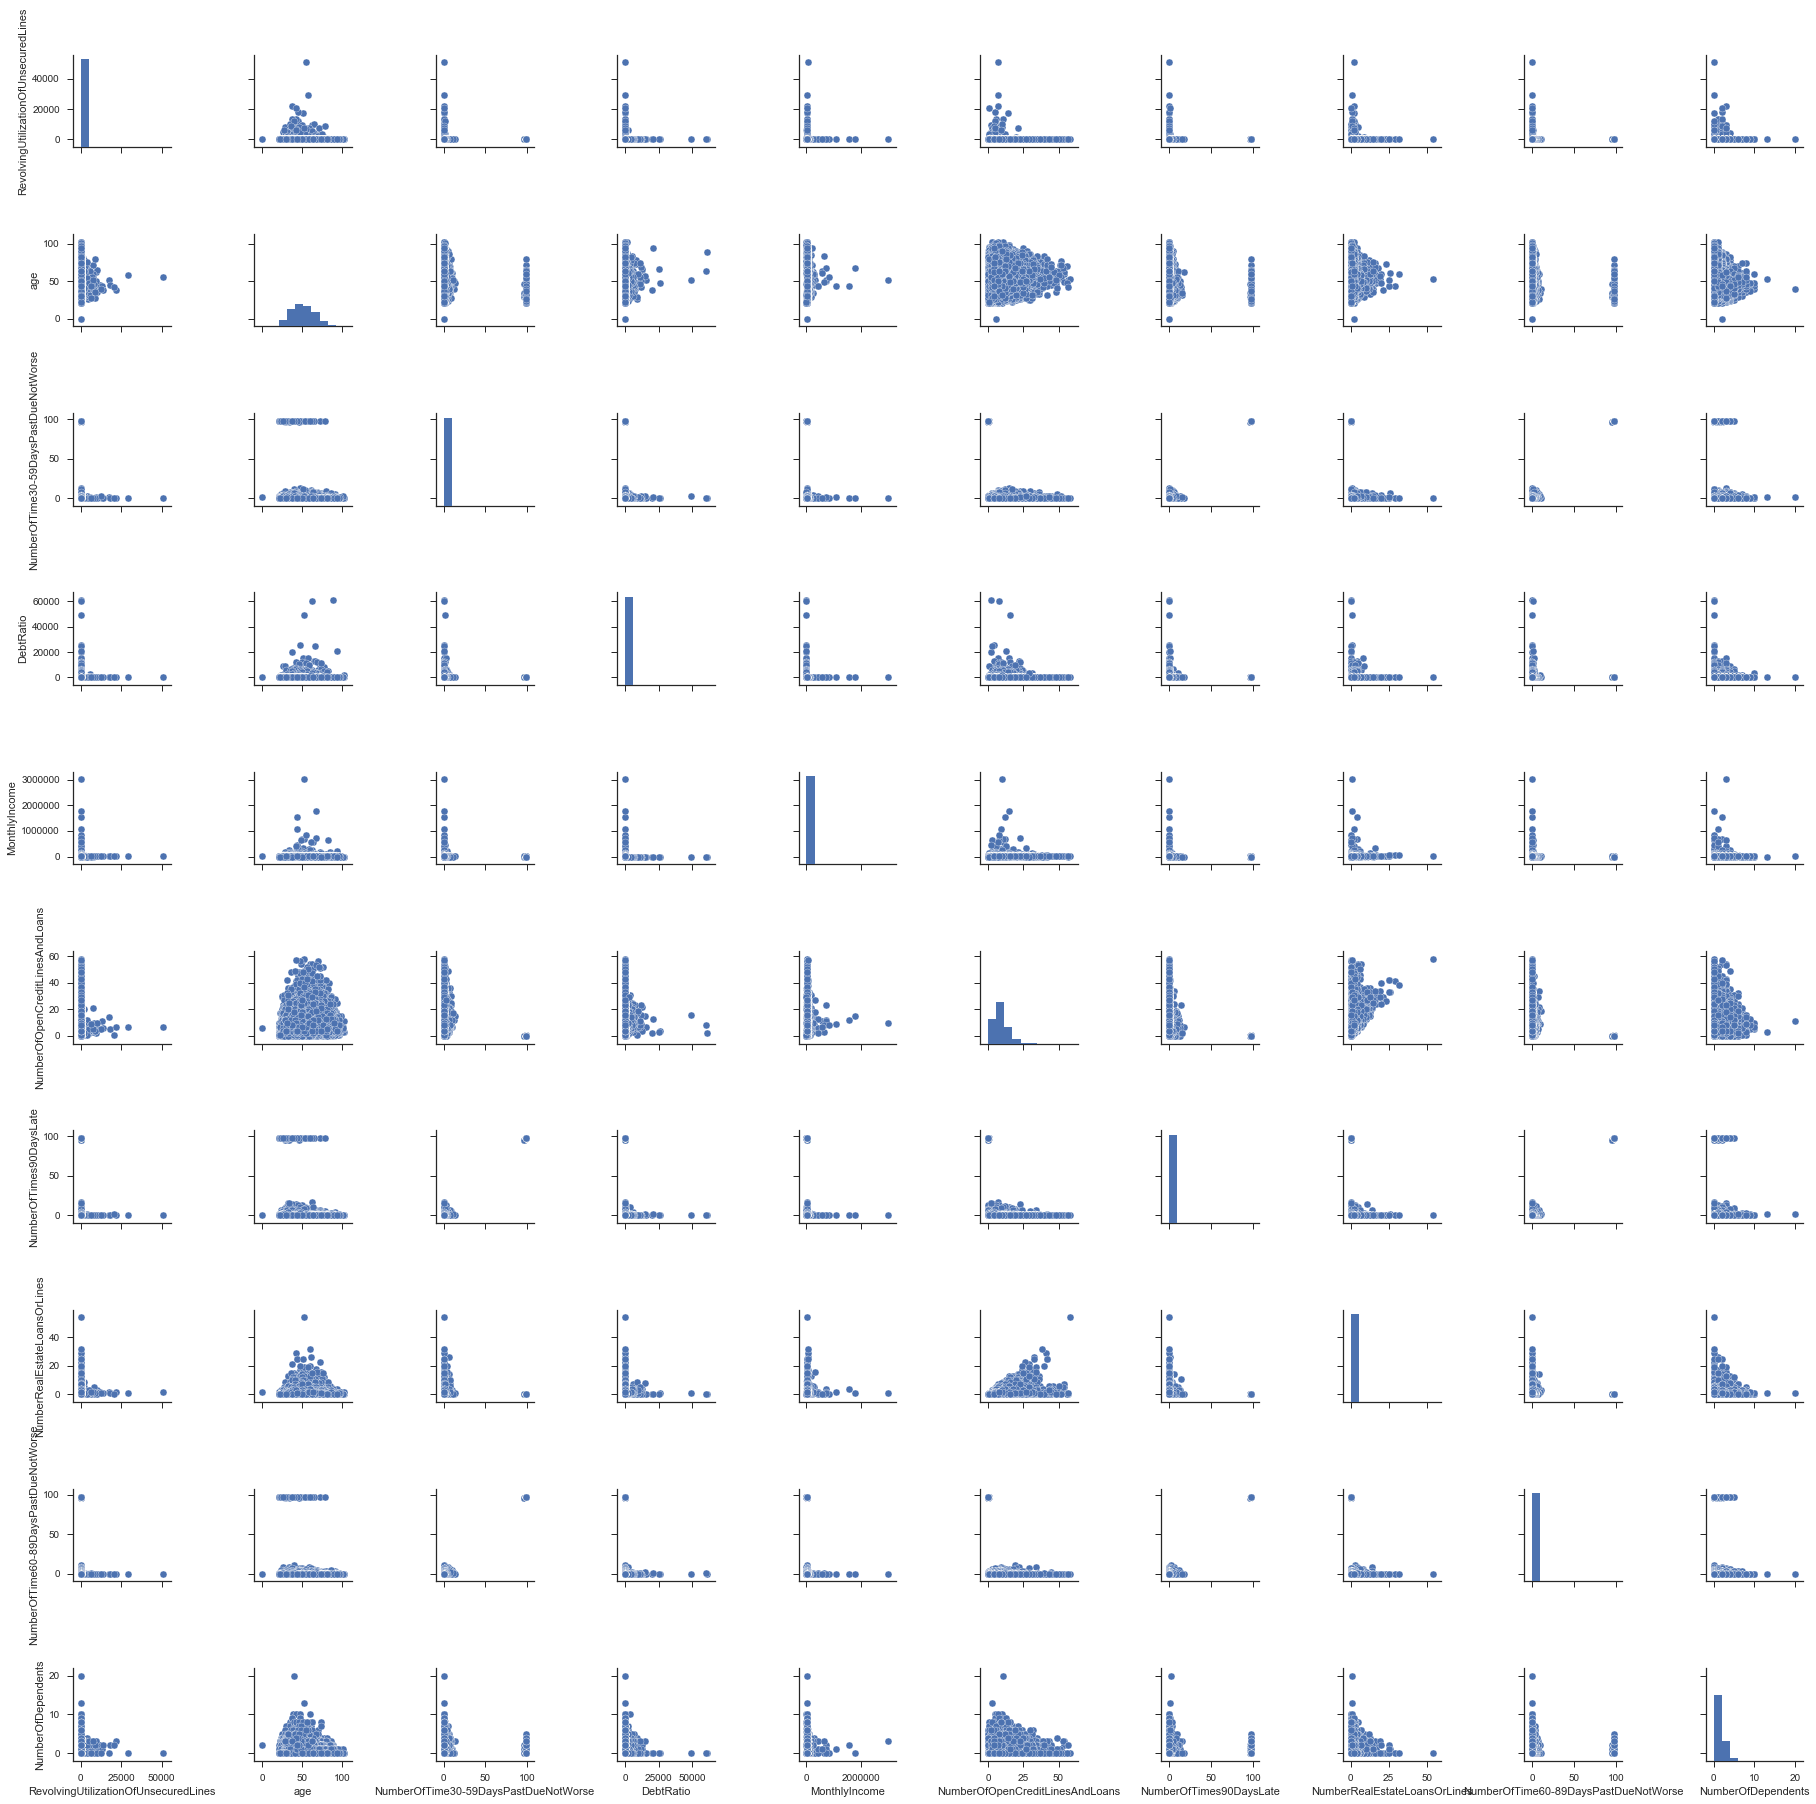

In [42]:
import seaborn as sns
%matplotlib inline
sns.pairplot(X)

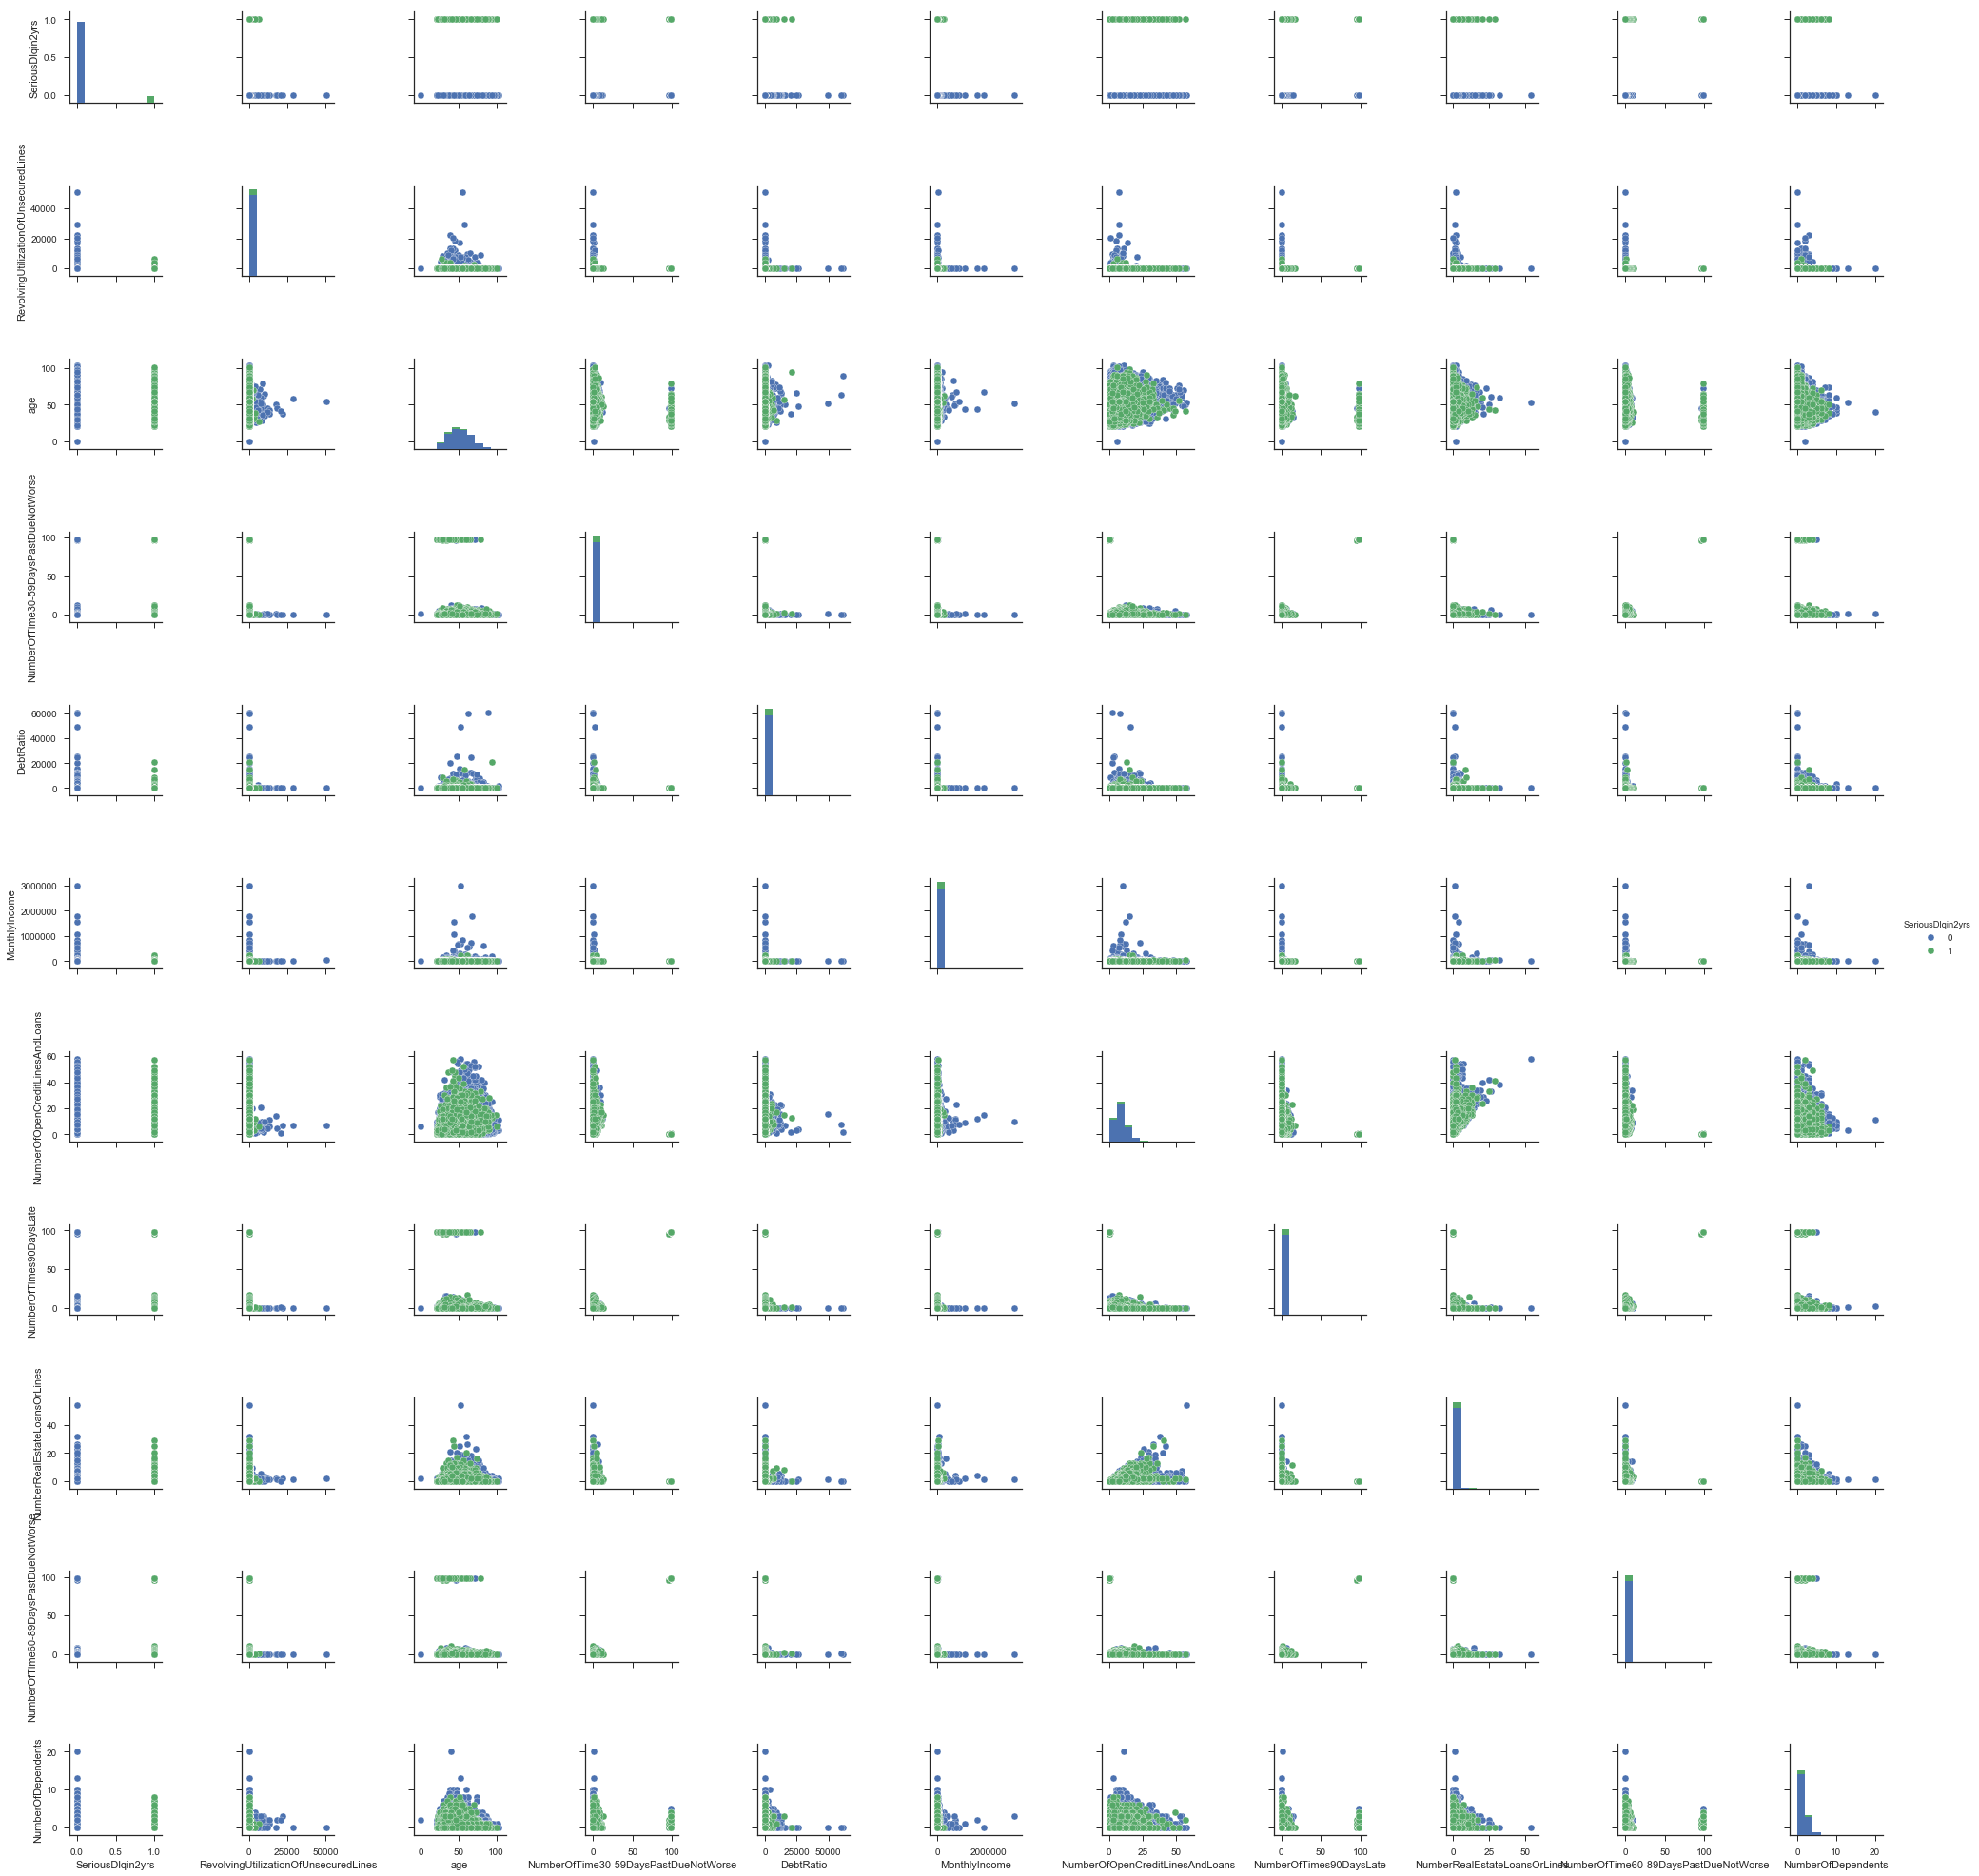

In [47]:
g = sns.pairplot(Training, hue="SeriousDlqin2yrs")

C:\Users\sbean\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sbean\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


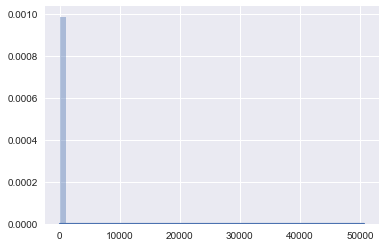

In [49]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(Training[['RevolvingUtilizationOfUnsecuredLines']])

C:\Users\sbean\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sbean\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


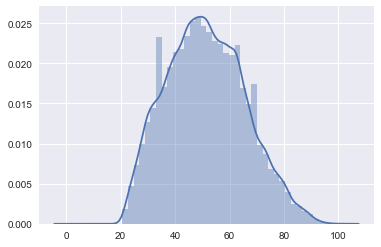

In [50]:
sns.distplot(Training[['age']])

C:\Users\sbean\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sbean\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


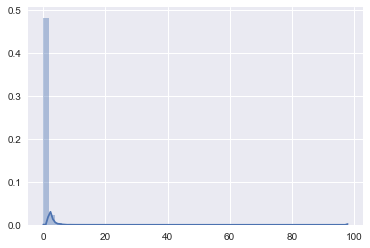

In [51]:
sns.distplot(Training[['NumberOfTime30-59DaysPastDueNotWorse']])

C:\Users\sbean\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sbean\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


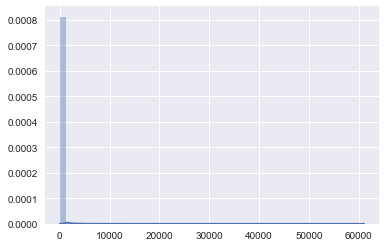

In [52]:
sns.distplot(Training[['DebtRatio']])

C:\Users\sbean\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sbean\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


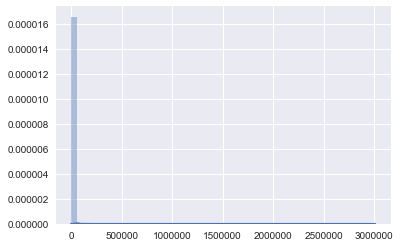

In [53]:
sns.distplot(Training[['MonthlyIncome']])

C:\Users\sbean\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sbean\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


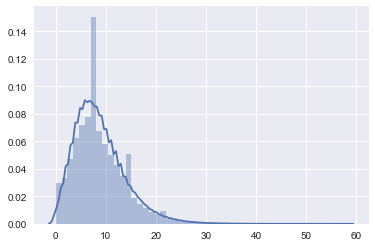

In [54]:
sns.distplot(Training[['NumberOfOpenCreditLinesAndLoans']])

C:\Users\sbean\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sbean\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


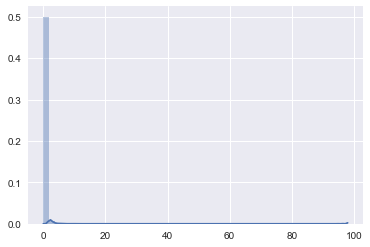

In [55]:
sns.distplot(Training[['NumberOfTimes90DaysLate']])

C:\Users\sbean\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


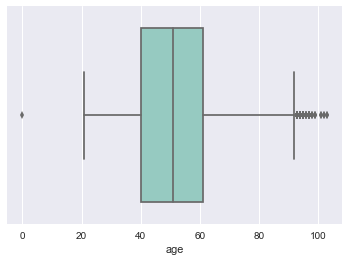

In [56]:
ax = sns.boxplot(x="age", hue="SeriousDlqin2yrs",
data=Training, palette="Set3")

C:\Users\sbean\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


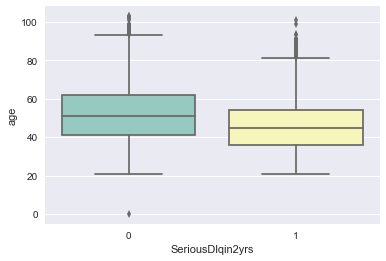

In [62]:
sns.boxplot( x=Training["SeriousDlqin2yrs"], y=Training["age"], palette="Set3" )
sns.plt.show()

C:\Users\sbean\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


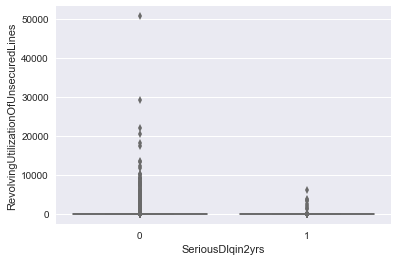

In [63]:
sns.boxplot( x=Training["SeriousDlqin2yrs"], y=Training["RevolvingUtilizationOfUnsecuredLines"], palette="Set3" )
sns.plt.show()

C:\Users\sbean\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


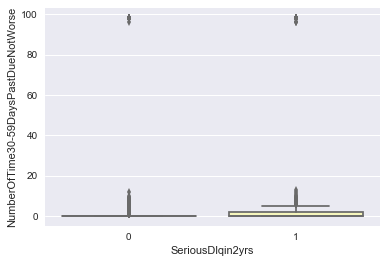

In [64]:
sns.boxplot( x=Training["SeriousDlqin2yrs"], y=Training["NumberOfTime30-59DaysPastDueNotWorse"], palette="Set3" )
sns.plt.show()

C:\Users\sbean\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


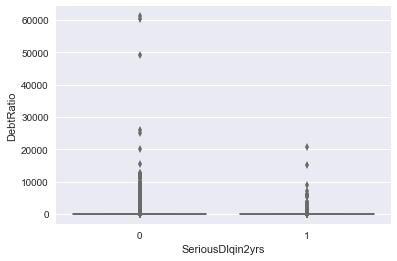

In [65]:
sns.boxplot( x=Training["SeriousDlqin2yrs"], y=Training["DebtRatio"], palette="Set3" )
sns.plt.show()

C:\Users\sbean\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


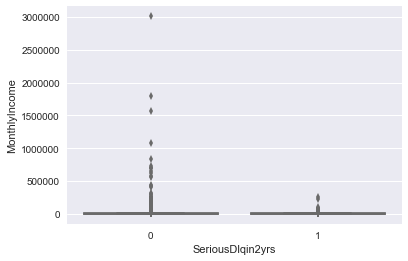

In [66]:
sns.boxplot( x=Training["SeriousDlqin2yrs"], y=Training["MonthlyIncome"], palette="Set3" )
sns.plt.show()

C:\Users\sbean\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


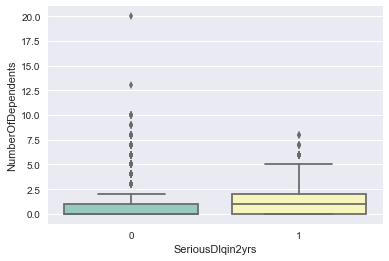

In [67]:
sns.boxplot( x=Training["SeriousDlqin2yrs"], y=Training["NumberOfDependents"], palette="Set3" )
sns.plt.show()

In [68]:
names = Training.columns

In [70]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [71]:
scaled_df = scaler.fit_transform(Training)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [72]:
Training.head()

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 1                              0.766127   45   
1                 0                              0.957151   40   
2                 0                              0.658180   38   
3                 0                              0.233810   30   
4                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

array([[-0.01907877, -1.26531743, -0.1088871 , ..., -0.91314755,
        -0.05454363, -0.74189896],
       [-0.01842648, -0.08949033,  0.17360085, ..., -0.04823135,
        -0.05454363,  0.12401782],
       [-0.01992315, -0.64282073, -0.1088871 , ...,  0.81668484,
        -0.05454363,  0.9899346 ],
       ...,
       [-0.01890983,  1.43216827, -0.1088871 , ...,  0.81668484,
        -0.05454363,  0.12401782],
       [-0.01985147,  0.53300637,  1.5860406 , ..., -0.04823135,
         0.51870471,  0.12401782],
       [-0.01878232, -1.54198263, -0.1088871 , ..., -0.91314755,
        -0.05454363, -0.74189896]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(len(X_train))
print(len(X_test))

72161
48108


In [77]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
prediction['Logistic'] = logreg.predict(X_test)

pred4=prediction['Logistic']
print(roc_auc_score(y_test, pred4))

0.5046031587173792


C:\Users\sbean\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


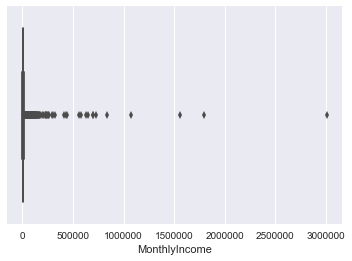

In [78]:
import seaborn as sns
sns.boxplot(x=Training['MonthlyIncome'])

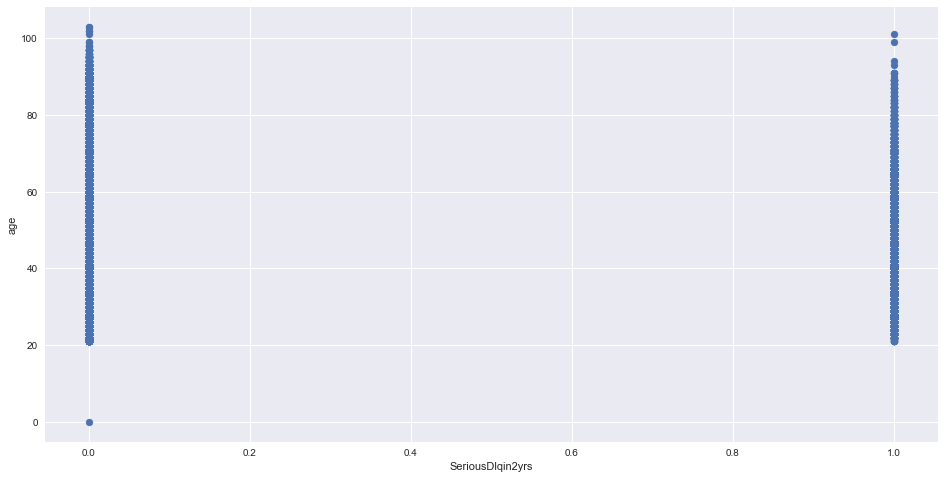

In [81]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(Training['SeriousDlqin2yrs'], Training['age'])
ax.set_xlabel('SeriousDlqin2yrs')
ax.set_ylabel('age')
plt.show()

In [83]:
Training.describe()

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     120269.000000                         120269.000000  120269.000000   
mean           0.069486                              5.899873      51.289792   
std            0.254280                            257.040685      14.426684   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.035084      40.000000   
50%            0.000000                              0.177282      51.000000   
75%            0.000000                              0.579428      61.000000   
max            1.000000                          50708.000000     103.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         120269.000000  120269.000000   1.202690e+05   
mean                               0.381769      26.598777   6.670221e+03   
std                                3.499234     

In [84]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(Training))
print(z)

[[3.65942733 0.01997259 0.43598504 ... 4.30315443 0.05447654 0.9998099 ]
 [0.2732668  0.01922942 0.78256647 ... 0.91755695 0.05447654 0.12902268]
 [0.2732668  0.02039255 0.92119905 ... 0.91755695 0.05447654 0.74176455]
 ...
 [0.2732668  0.02178702 0.50530132 ... 0.04743839 0.05447654 0.9998099 ]
 [0.2732668  0.02295316 1.47572935 ... 0.91755695 0.05447654 0.74176455]
 [0.2732668  0.01964518 0.88102443 ... 0.82268018 0.05447654 0.74176455]]


In [85]:
threshold = 3
print(np.where(z > 3))

(array([     0,      0,      4, ..., 120243, 120243, 120251], dtype=int64), array([ 0,  8,  5, ...,  0, 10,  0], dtype=int64))


In [87]:
Q1 = Training.quantile(0.25)
Q3 = Training.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.544344
age                                       21.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.339172
MonthlyIncome                           4849.000000
NumberOfOpenCreditLinesAndLoans            6.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               2.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         2.000000
dtype: float64


In [89]:
print(Training < (Q1 - 1.5 * IQR)) |(Training) > (Q3 + 1.5 * IQR)

        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines    age  \
0                  False                                 False  False   
1                  False                                 False  False   
2                  False                                 False  False   
3                  False                                 False  False   
4                  False                                 False  False   
5                  False                                 False  False   
7                  False                                 False  False   
9                  False                                 False  False   
10                 False                                 False  False   
11                 False                                 False  False   
12                 False                                 False  False   
13                 False                                 False  False   
14                 False                           

TypeError: Could not compare [None] with block values

In [124]:
Training_df_o = Training[(z < 3)(axis=1)]

TypeError: 'numpy.ndarray' object is not callable

In [117]:
Training.SeriousDlqin2yrs.value_counts()

0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64

In [95]:
Training_df_o.shape

(107686, 11)

In [96]:
Training.shape

(120269, 11)

In [102]:
y2 = Training_df_o.SeriousDlqin2yrs

In [103]:
X2 = Training_df_o.drop(['SeriousDlqin2yrs'], axis=1)

In [109]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.4, random_state=42)
print(len(X_train3))
print(len(X_test3))

64611
43075


In [107]:
y2

1         0
2         0
3         0
5         0
7         0
9         0
10        0
11        0
12        0
14        0
15        0
17        0
18        0
19        0
20        0
22        0
23        0
24        0
26        0
27        0
28        0
29        0
30        0
31        0
33        0
34        0
35        0
36        0
37        0
38        0
         ..
149956    0
149957    0
149959    0
149962    0
149964    0
149966    0
149969    0
149970    0
149971    0
149972    0
149973    0
149974    0
149978    0
149980    0
149981    0
149982    0
149983    0
149985    0
149986    0
149987    0
149988    0
149989    0
149990    0
149991    0
149993    0
149994    0
149995    0
149996    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 107686, dtype: int64

In [110]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train3, y_train3)
prediction['Logistic'] = logreg.predict(X_test3)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [113]:
y_train3.value_counts()

0    64611
Name: SeriousDlqin2yrs, dtype: int64

In [120]:
Training.SeriousDlqin2yrs.describe()

count    120269.000000
mean          0.069486
std           0.254280
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [122]:

# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# summarize
print('mean=%.3f stdv=%.3f' % (mean(Training), std(Training)))

TypeError: cannot convert the series to <class 'float'>